In [150]:
import warnings
warnings.filterwarnings('ignore')

In [151]:
import numpy as np
import pandas as pd

In [152]:
data = pd.read_csv('C:/Users/Aravind/PROJECTS/Enefit-Predicting-Energy-Behavior/Enefit/data/external/gas_prices.csv')

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   forecast_date          637 non-null    object 
 1   lowest_price_per_mwh   637 non-null    float64
 2   highest_price_per_mwh  637 non-null    float64
 3   origin_date            637 non-null    object 
 4   data_block_id          637 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.0+ KB


In [154]:
data.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [155]:
data.describe()

,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
count,637.000000,637.000000,637.000000
mean,95.036750,107.754631,319.000000
std,47.552295,54.743666,184.030342
min,28.100000,34.000000,1.000000
25%,60.000000,67.530000,160.000000
50%,85.210000,93.470000,319.000000
75%,109.000000,130.740000,478.000000
max,250.000000,305.000000,637.000000


In [156]:
path = 'C:/Users/Aravind/PROJECTS/Enefit-Predicting-Energy-Behavior/Enefit/data/external/gas_prices.csv'
df = pd.read_csv(path , parse_dates=['forecast_date'])

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   forecast_date          637 non-null    datetime64[ns]
 1   lowest_price_per_mwh   637 non-null    float64       
 2   highest_price_per_mwh  637 non-null    float64       
 3   origin_date            637 non-null    object        
 4   data_block_id          637 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 25.0+ KB


In [158]:
df = df.sort_values("forecast_date").set_index("forecast_date")
df = df.drop(['origin_date','data_block_id'] , axis=1)
df = df.drop_duplicates()

In [159]:
df.head()

,lowest_price_per_mwh,highest_price_per_mwh
forecast_date,,
2021-09-01,45.23,46.32
2021-09-02,45.62,46.29
2021-09-03,45.85,46.40
2021-09-04,46.30,46.80
2021-09-05,46.30,46.58


In [160]:
df.tail()

,lowest_price_per_mwh,highest_price_per_mwh
forecast_date,,
2023-05-26,29.10,34.10
2023-05-27,28.30,34.10
2023-05-28,28.10,34.10
2023-05-29,28.16,36.98
2023-05-30,29.00,34.00


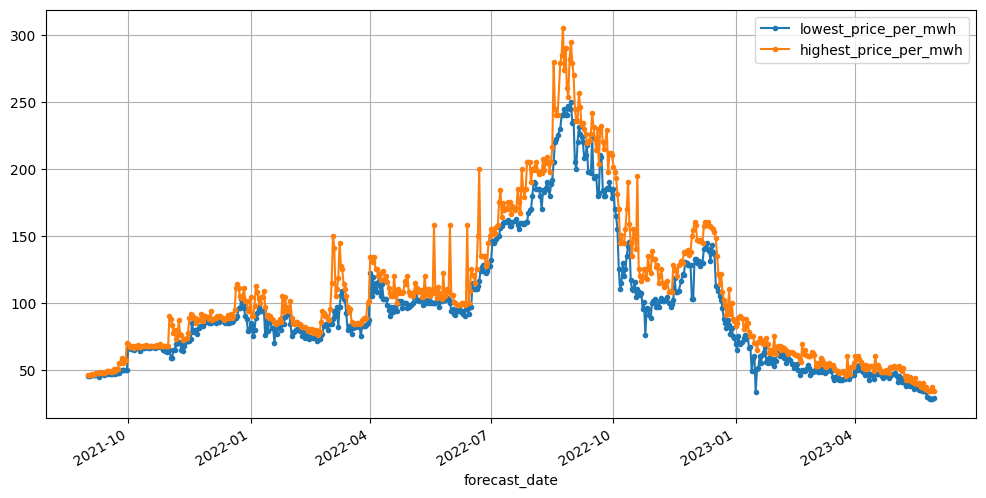

In [161]:
import matplotlib.pyplot as plt

df[:].plot(grid=True , marker='.' , figsize=(12,6))
plt.show()

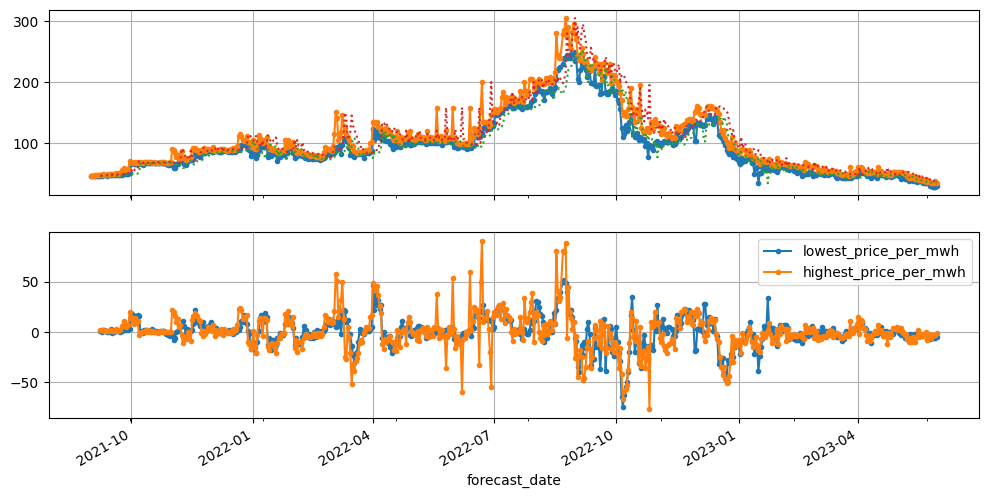

In [162]:
diff_7 = df[['lowest_price_per_mwh','highest_price_per_mwh']].diff(7)[:]

fig , axs = plt.subplots(2,1,sharex=True,figsize=(12,6))
df.plot(ax=axs[0] , legend=False , marker='.')
df.shift(7).plot(ax=axs[0] , grid=True , legend=False , linestyle=':')
diff_7.plot(ax=axs[1] , grid=True , marker='.')
plt.show()

In [163]:
diff_7.abs().mean()

lowest_price_per_mwh      9.294630
highest_price_per_mwh    11.700643
dtype: float64

In [164]:
targets = df[['lowest_price_per_mwh','highest_price_per_mwh']][:]
(diff_7 / targets).abs().mean()

lowest_price_per_mwh     0.096917
highest_price_per_mwh    0.103545
dtype: float64

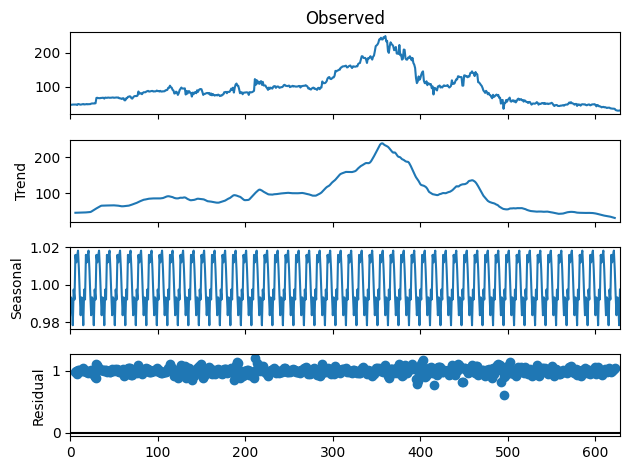

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompse = seasonal_decompose(np.array(df['lowest_price_per_mwh']), 
model='multiplicative', period = 12)
plot = decompse.plot()

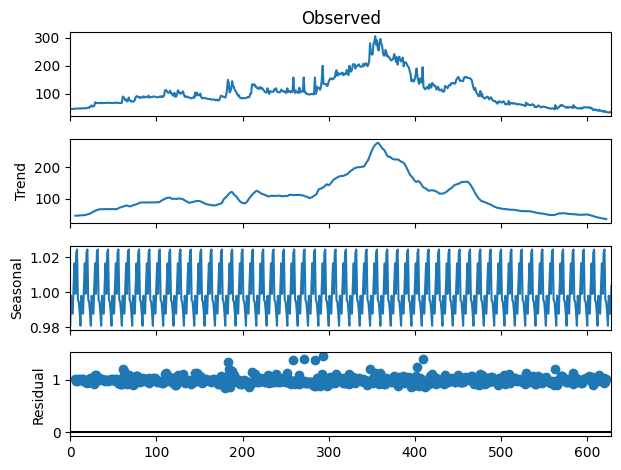

In [166]:
decompse = seasonal_decompose(np.array(df['highest_price_per_mwh']), 
model='multiplicative', period = 12)
plot = decompse.plot()

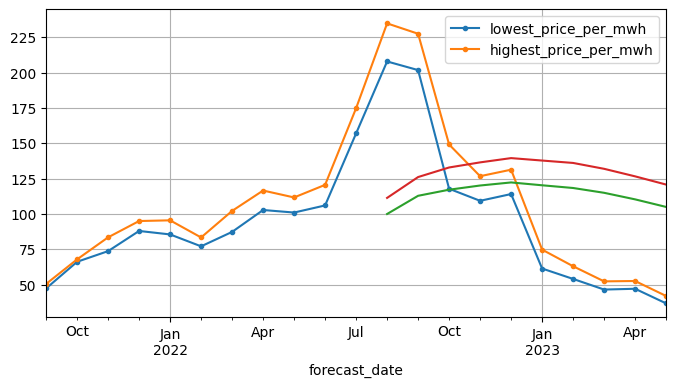

In [167]:
period = slice("2021", "2023")
df_monthly = df.resample('M').mean()  # compute the mean for each month
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)

plt.show()

In [168]:
from statsmodels.tsa.arima.model import ARIMA

origin, today = "2021-09-01", "2022-07-23"
rail_series = df.loc[origin:today]["lowest_price_per_mwh"].asfreq("D")
model = ARIMA(rail_series,
              order=(1, 0, 0),
              seasonal_order=(0, 1, 1, 7))
model = model.fit()
y_pred = model.forecast()

In [169]:
y_pred[0]

159.99943713731625

In [170]:
origin, start_date, end_date = "2019-01-01", "2022-07-23", "2023-05-30"
time_period = pd.date_range(start_date, end_date)
rail_series = df.loc[origin:end_date]["lowest_price_per_mwh"].asfreq("D")
y_preds = []
for today in time_period.shift(-1):
    model = ARIMA(rail_series[origin:today],  # train on data up to "today"
                  order=(1, 0, 0),
                  seasonal_order=(0, 1, 1, 7))
    model = model.fit()  # note that we retrain the model every day!
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

y_preds = pd.Series(y_preds, index=time_period)
mae = (y_preds - rail_series[time_period]).abs().mean()

In [171]:
mae

4.866585462805204

In [172]:
df.shape

(629, 2)

In [173]:
train = df["lowest_price_per_mwh"]["2019-01-01":"2022-10-06"] 
valid = df["lowest_price_per_mwh"]["2022-10-07":"2023-01-29"] 
test = df["lowest_price_per_mwh"]["2023-01-30":]

In [174]:
import tensorflow as tf

seq_length = 30
tf.random.set_seed(42)
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train.to_numpy(),
    targets=train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    valid.to_numpy(),
    targets=valid[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [175]:
def fit_and_evaluate(model, train_set, valid_set, learning_rate=0.01, epochs=20):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9 , nesterov=True)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
    history = model.fit(train_set, validation_data=valid_set, epochs=epochs,
                        callbacks=[early_stopping_cb])
    valid_loss, valid_mae = model.evaluate(valid_set)
    return valid_mae

In [176]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, input_shape=[None, 1]),
    tf.keras.layers.Dense(1) 
])

In [177]:
fit_and_evaluate(model1, train_ds, valid_ds)

Epoch 1/20
12/12 [==============================] - 1s 19ms/step - loss: 83.7108 - mae: 84.2108 - val_loss: 27.6457 - val_mae: 28.1446
Epoch 2/20
12/12 [==============================] - 0s 8ms/step - loss: 37.2382 - mae: 37.7358 - val_loss: 30.2314 - val_mae: 30.7304
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 35.3137 - mae: 35.8116 - val_loss: 26.5092 - val_mae: 27.0076
Epoch 4/20
12/12 [==============================] - 0s 8ms/step - loss: 33.7444 - mae: 34.2406 - val_loss: 25.6404 - val_mae: 26.1404
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 33.2967 - mae: 33.7923 - val_loss: 25.7576 - val_mae: 26.2576
Epoch 6/20
12/12 [==============================] - 0s 8ms/step - loss: 33.3251 - mae: 33.8208 - val_loss: 25.9677 - val_mae: 26.4677
Epoch 7/20
12/12 [==============================] - 0s 8ms/step - loss: 33.3682 - mae: 33.8635 - val_loss: 25.6258 - val_mae: 26.1257
Epoch 8/20
12/12 [==============================] - 0s 8ms/st

26.0358829498291

In [178]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model2 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(1)
])

In [179]:
fit_and_evaluate(model2, train_ds, valid_ds)

Epoch 1/20
12/12 [==============================] - 1s 25ms/step - loss: 86.7947 - mae: 87.2947 - val_loss: 31.1303 - val_mae: 31.6303
Epoch 2/20
12/12 [==============================] - 0s 11ms/step - loss: 37.0520 - mae: 37.5482 - val_loss: 29.7454 - val_mae: 30.2444
Epoch 3/20
12/12 [==============================] - 0s 11ms/step - loss: 36.2410 - mae: 36.7394 - val_loss: 26.2859 - val_mae: 26.7840
Epoch 4/20
12/12 [==============================] - 0s 11ms/step - loss: 33.7157 - mae: 34.2134 - val_loss: 25.6948 - val_mae: 26.1948
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 33.2761 - mae: 33.7674 - val_loss: 25.4787 - val_mae: 25.9727
Epoch 6/20
12/12 [==============================] - 0s 11ms/step - loss: 33.2827 - mae: 33.7728 - val_loss: 25.6680 - val_mae: 26.1680
Epoch 7/20
12/12 [==============================] - 0s 11ms/step - loss: 33.3576 - mae: 33.8539 - val_loss: 25.6035 - val_mae: 26.1024
Epoch 8/20
12/12 [==============================] - 0s 

26.212146759033203

In [180]:
df_mulvar = df[["lowest_price_per_mwh", "highest_price_per_mwh"]]

In [181]:
train = df_mulvar["2019-01-01":"2022-10-06"]
valid = df_mulvar["2022-10-07":"2023-01-29"]
test = df_mulvar["2023-01-30":]

In [182]:
tf.random.set_seed(42)
seq_length = 30
train_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    train.to_numpy(),  
    targets=train[["lowest_price_per_mwh", "highest_price_per_mwh"]][seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    valid.to_numpy(),
    targets=valid[["lowest_price_per_mwh", "highest_price_per_mwh"]][seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [183]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model3 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, input_shape=[None, 2]),
    tf.keras.layers.Dense(2)
])

In [184]:
fit_and_evaluate(model3, train_mulvar_ds, valid_mulvar_ds)

Epoch 1/20


12/12 [==============================] - 1s 19ms/step - loss: 105.0726 - mae: 105.5726 - val_loss: 62.4192 - val_mae: 62.9192
Epoch 2/20
12/12 [==============================] - 0s 8ms/step - loss: 54.3158 - mae: 54.8122 - val_loss: 26.9476 - val_mae: 27.4451
Epoch 3/20
12/12 [==============================] - 0s 7ms/step - loss: 38.6059 - mae: 39.1023 - val_loss: 27.1946 - val_mae: 27.6927
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 37.3551 - mae: 37.8507 - val_loss: 27.2303 - val_mae: 27.7303
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 36.9716 - mae: 37.4678 - val_loss: 27.5633 - val_mae: 28.0625
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 36.7101 - mae: 37.2036 - val_loss: 26.8297 - val_mae: 27.3297
Epoch 7/20
12/12 [==============================] - 0s 7ms/step - loss: 36.5334 - mae: 37.0297 - val_loss: 26.7756 - val_mae: 27.2756
Epoch 8/20
12/12 [==============================] - 0s 9ms/step - loss

27.29734230041504

In [191]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model4 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, return_sequences=True, input_shape=[None, 2]),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(2)
])

In [192]:
fit_and_evaluate(model3, train_mulvar_ds, valid_mulvar_ds)

Epoch 1/20
12/12 [==============================] - 1s 22ms/step - loss: 36.4926 - mae: 36.9866 - val_loss: 26.7860 - val_mae: 27.2858
Epoch 2/20
12/12 [==============================] - 0s 10ms/step - loss: 36.4366 - mae: 36.9317 - val_loss: 26.9279 - val_mae: 27.4279
Epoch 3/20
12/12 [==============================] - 0s 10ms/step - loss: 36.4808 - mae: 36.9728 - val_loss: 26.7468 - val_mae: 27.2466
Epoch 4/20
12/12 [==============================] - 0s 9ms/step - loss: 36.6152 - mae: 37.1099 - val_loss: 26.9050 - val_mae: 27.4050
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 36.4727 - mae: 36.9669 - val_loss: 26.7135 - val_mae: 27.2111
Epoch 6/20
12/12 [==============================] - 0s 8ms/step - loss: 36.4978 - mae: 36.9908 - val_loss: 26.7257 - val_mae: 27.2234
Epoch 7/20
12/12 [==============================] - 0s 8ms/step - loss: 36.5279 - mae: 37.0208 - val_loss: 26.8423 - val_mae: 27.3423
Epoch 8/20
12/12 [==============================] - 0s 8ms/

27.285776138305664

In [185]:
train = df["lowest_price_per_mwh"]["2019-01-01":"2022-10-06"]
valid = df["lowest_price_per_mwh"]["2022-10-07":"2023-01-29"] 
test = df["lowest_price_per_mwh"]["2023-01-30":] 

In [186]:
X = valid.to_numpy()[np.newaxis, :seq_length, np.newaxis]
for step_ahead in range(30):
    y_pred_one = model1.predict(X)
    X = np.concatenate([X, y_pred_one.reshape(1, 1, 1)], axis=1)

1/1 [==============================] - 0s 15ms/step


In [187]:
X

array([[[115.        ],
        [130.        ],
        [120.        ],
        [125.        ],
        [135.        ],
        [142.1       ],
        [145.02      ],
        [117.        ],
        [110.        ],
        [109.74      ],
        [115.5       ],
        [104.        ],
        [110.        ],
        [108.29      ],
        [105.53      ],
        [107.        ],
        [ 95.        ],
        [100.29      ],
        [ 76.29      ],
        [ 96.        ],
        [ 95.        ],
        [ 90.79      ],
        [ 88.29      ],
        [100.        ],
        [101.        ],
        [103.01      ],
        [ 97.02      ],
        [ 99.29      ],
        [ 97.        ],
        [101.        ],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.11746216],
        [ 96.117

In [188]:
data.tail()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636
636,2023-05-30,29.00,34.00,2023-05-29,637


In [190]:
'''Y_pred = pd.Series(X[0, -30:, 0],
                   index=pd.date_range("2023-05-31", "2023-06-29"))

fig, ax = plt.subplots(figsize=(8, 3.5))
(valid)["2023-05-01":"2023-06-30"].plot(
    label="True", marker=".", ax=ax)
(Y_pred).plot(
    label="Predictions", grid=True, marker="x", color="r", ax=ax)
ax.vlines("2023-05-30", 0, 1e6, color="k", linestyle="--", label="Today")
plt.legend(loc="center left")
plt.show()'''

'Y_pred = pd.Series(X[0, -30:, 0],\n                   index=pd.date_range("2023-05-31", "2023-06-29"))\n\nfig, ax = plt.subplots(figsize=(8, 3.5))\n(valid)["2023-05-01":"2023-06-30"].plot(\n    label="True", marker=".", ax=ax)\n(Y_pred).plot(\n    label="Predictions", grid=True, marker="x", color="r", ax=ax)\nax.vlines("2023-05-30", 0, 1e6, color="k", linestyle="--", label="Today")\nplt.legend(loc="center left")\nplt.show()'